In [1]:
import pandas as pd
import numpy as np
import seaborn as sns # Librerias de graficos
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("loan_data.csv")
df.head(5)

,Text,Income,Credit_Score,Loan_Amount,DTI_Ratio,Employment_Status,Approval
0,I need a loan to pay for an international vaca...,26556,581,8314,79.26,employed,Rejected
1,I want to make home improvements like installi...,197392,389,111604,22.14,employed,Rejected
2,"I need a loan for home renovation, including a...",44561,523,34118,45.44,employed,Rejected
3,I need funds to buy new furniture and applianc...,190363,729,118757,10.22,unemployed,Rejected
4,I need a loan to start a small business.,61853,732,19210,44.13,employed,Approved


In [3]:
# Elimino columna que no me sirve para el analisis
df = df.drop(columns=['Text'])

In [4]:
headers = ["Ingreso", "Score_Credito", "Monto_Deuda", "Deuda/Ingreso", "Empleo", "Credito"]
df.columns = headers

In [5]:
# Convierto los resultados de las ultimas columnas a valores numericos, ya que hay solo dos posibles resultados, 0 y 1 tanto
# si es para el valor "Aprobado" y "Rechazado" como con la otra columna donde los valores son "Empleado" y "Desempleado"
df.Credito = df.Credito.replace(['Rejected'], 0)
df.Credito = df.Credito.replace(['Approved'], 1)

df.Empleo = df.Empleo.replace(['unemployed'], 0)
df.Empleo = df.Empleo.replace(['employed'], 1)

In [6]:
df.sample(5)

,Ingreso,Score_Credito,Monto_Deuda,Deuda/Ingreso,Empleo,Credito
14194,168972,476,43461,16.26,0,0
17381,120013,447,61039,30.68,0,0
7743,78208,500,55313,41.82,0,0
9176,167105,828,23913,6.47,1,1
3518,100604,375,75917,18.11,1,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ingreso        24000 non-null  int64  
 1   Score_Credito  24000 non-null  int64  
 2   Monto_Deuda    24000 non-null  int64  
 3   Deuda/Ingreso  24000 non-null  float64
 4   Empleo         24000 non-null  int64  
 5   Credito        24000 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 1.1 MB


In [8]:
df.Empleo.value_counts()

0    12007
1    11993
Name: Empleo, dtype: int64

In [9]:
conteo = df.Empleo.value_counts()

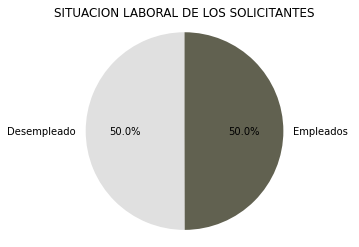

In [10]:
etiquetas = ['Empleados' if val == 1 else 'Desempleado' for val in conteo.index]

plt.pie(conteo, labels=etiquetas, autopct='%1.1f%%', startangle=90, colors=['#E0E0E0', '#616150'])
plt.title('SITUACION LABORAL DE LOS SOLICITANTES')
plt.axis('equal')  # Mantener forma de círculo

plt.show()

In [11]:
df.Credito.value_counts()

0    20067
1     3933
Name: Credito, dtype: int64

In [12]:
conteo = df.Credito.value_counts()

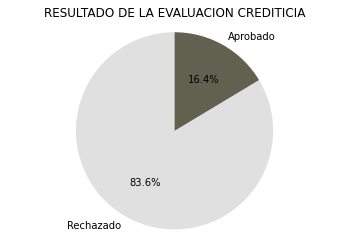

In [13]:
etiquetas = ['Aprobado' if val == 1 else 'Rechazado' for val in conteo.index]

plt.pie(conteo, labels=etiquetas, autopct='%1.1f%%', startangle=90, colors=['#E0E0E0', '#616150'])
plt.title('RESULTADO DE LA EVALUACION CREDITICIA')
plt.axis('equal')  # Mantener forma de círculo

plt.show()